# Programming Assignment 1

## Dataload and inspection of the digits dataset

In [2]:
from sklearn import datasets, metrics
import matplotlib.pyplot as plt

In [3]:
digits = datasets.load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
digits.data.shape

(1797, 64)

Associate the image with its label

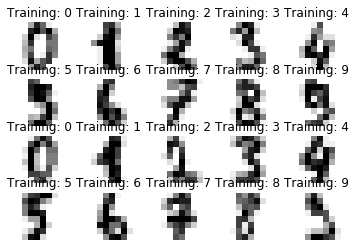

In [6]:
image_with_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(image_with_labels[:20]):
    plt.subplot(4, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' %label)

## Prepare data for training
Split your data set into 70% training data (features and labels), and 30% test data.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.3, random_state = 20)
X_train.data.shape

(1257, 64)

In [8]:
X_test.data.shape

(540, 64)

## Setup classifier
Set up a sklearn.neighbors.KNeighborsClassifier as it comes in SciKitLearn with n_neighbors = 5, algorithm = 'brute' and otherwise default parameters

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
neighbors_classifier = KNeighborsClassifier(n_neighbors = 5, algorithm = 'brute')
k_means_classifier = KMeans(n_clusters=10)

Fit a model to the training data

In [10]:
neighbors_classifier.fit(X_train, y_train)
k_means_classifier.fit(X_train, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Apply the classifier to the test data

In [11]:
predictions = neighbors_classifier.predict(X_test)
k_means_predictions = k_means_classifier.predict(X_test)

#### KNN Classifier
Get the nearest neighbors (in this case 5) and the corresponding distances in the training set for each test sample
The function returns the indices of k(=5) neighbors from the training dataset for each element of the test set 

In [12]:
distances, neighbors_ind = neighbors_classifier.kneighbors(X_test)
neighbors = X_train[neighbors_ind]
neighbors.data.shape

(540, 5, 64)

Let's plot the image from the test set and its neighbors from the training data

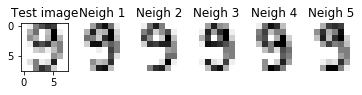

In [13]:
plt.subplot(1, 6, 1)
plt.imshow(X_test[50].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('Test image')
for index, image in enumerate(neighbors[50]):
    plt.subplot(1, 6, index + 2)
    plt.axis('off')
    plt.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Neigh {index+1}')

## Classification Report
Let's see plot some images with their prediction


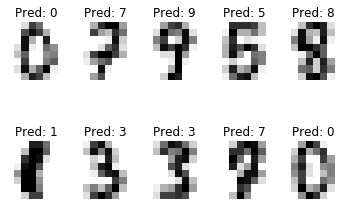

In [14]:
images_with_predictions = list(zip(X_test, predictions))
plt.tight_layout()
for index, (image, prediction) in enumerate(images_with_predictions[:10]):
    plt.subplot(2, 5, index+1)
    plt.axis('off')
    plt.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Pred: %s' %prediction)

Using Sklearn, we can compute the classification report

In [15]:
from sklearn import metrics
import seaborn as sn

def print_classification_report(classifier, classifier_name, true_label, predictions):
    print('Classification report for classifier %s: \n %s\n' %(classifier,metrics.classification_report(true_label, predictions)))

    confusion_matrix = metrics.confusion_matrix(true_label, predictions)
    sn.set(font_scale=1.4)
    sn.heatmap(confusion_matrix, annot=True, annot_kws={"size": 16})
    plt.show()

#### KMeans Classifier

Classification report for classifier KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'): 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.97      1.00      0.98        56
           2       1.00      1.00      1.00        44
           3       0.98      0.97      0.98        63
           4       1.00      1.00      1.00        60
           5       0.96      0.98      0.97        51
           6       1.00      1.00      1.00        59
           7       0.98      0.98      0.98        53
           8       0.98      0.96      0.97        52
           9       0.96      0.94      0.95        52

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540




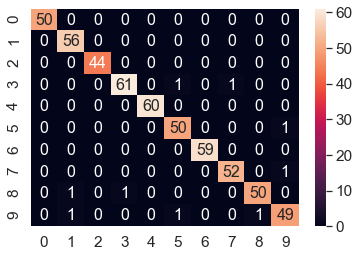

In [28]:
print_classification_report(neighbors_classifier, 'KNN Classifier', y_test, predictions)

## Confusion Matrix, Recall and Precision

A quick recall

![Recall and precision rate calculation with the confusion matrix](assets/recall_precision.png)

**Recall**


Out of all the **positive classes**, how much we **predicted correctly**. It should be high as possible.

**Precision**


Out of all the **positive classes** we have *predicted correctly*, how many are **actually positive**.

and **Accuracy** will be

Out of **all the classes**, how much we **predicted correctly**. It should be high as possible.

**F-measure**


It is difficult to compare two models with low precision and high recall or vice versa. So to make them comparable, we use F-Score. F-score helps to measure Recall and Precision at the same time. It uses Harmonic Mean in place of Arithmetic Mean by punishing the extreme values more.

In this case, we got **98%** of **precision** and **98%** of **recall** which is very high.

## KMeans Classifier

Classification report for classifier KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0): 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.42      0.55      0.48        56
           2       0.00      0.00      0.00        44
           3       0.00      0.00      0.00        63
           4       0.00      0.00      0.00        60
           5       0.00      0.00      0.00        51
           6       0.02      0.02      0.02        59
           7       0.00      0.00      0.00        53
           8       0.18      0.23      0.21        52
           9       0.02      0.02      0.02        52

    accuracy                           0.08       540
   macro avg       0.06      0.08      0.07       540
weighted avg       0.07      0.08      0.07       540




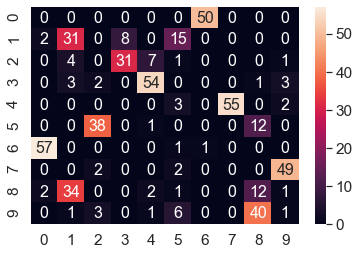

In [17]:
print_classification_report(k_means_classifier, 'KMeans Classifier', y_test, k_means_predictions)

Since KMeans Classifier is a clustering classifier, evaluations using the confusion matrix are not appropriate. Since the algorithm is **unsupervised** classification, it cannot know the label of the clusters. It can only form the images of the same character. This is why the confusion matrix does not have the high values on its diagonal.

## Clustering performance evaluation

Evaluating the performance of a clustering algorithm is not as trivial as counting the number of errors or the precision and recall of a supervised classification algorithm. In particular any evaluation metric **should not take the absolute values of the cluster labels into account** but rather if this clustering define **separations of the data similar to some ground truth** set of classes or **satisfying some assumption** such that **members** belong to the **same class** are **more similar** than **members** of **different classes** according to some *similarity metric*.

*Note:* 
- When saying **"ignoring permutation"**, what we mean is the groud truth label and the predicted label can be permuted (symetric, switching one with another) without changging the result.

### Adjusted Rand index

If C is a ground truth class assignment and K the clustering, let us define a and b as:
- a, the number of pairs of elements that are in the **same set** in C and in the **same set** in K
- b, the number of pairs of elements that are in **different sets** in C and in **different sets** in K

The **raw (unadjusted) Rand index** is ten given by:

![Raw Rand Index](assets/Raw_rand_index.png)

Given the knowledge of the ground truth class assignments labelstrue and our clustering algorithm assignments of the same samples labelspred, the **adjusted Rand index** is a function that measures the **similarity of the two assignments, ignoring permutations and with chance normalization**.

To counter this effect we can *discount* the expected RI of *random labelings* by defining the adjusted Rand index as follows:

![Adjusted Rand Index](assets/adjusted_rand_index.png)

**Advantages:**

- *Random (uniform) label assignments* have a **ARI** score **close to 0.0** for any value of n c lusters and n samples (which is not the case for raw Rand index or the V-measure for instance).
- Bounded range [-1, 1]: *negative* values are *bad* (independent labelings), *similar clusterings* have a **positive ARI**, **1.0** is the **perfect match score**.
- No assumption is made on the cluster structure: can be used to compare clustering algorithms such as k-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with "folded" shapes.

**Drawbacks:**

- Contrary to inertia, ARI **requires knowledge of the ground truth classes** while is almost **never available in practice** or requires *manual assignment by human annotators* (as in the supervised learning setting).


### Mutual Information based scores


Given the knowledge of the ground truth class assignments labels true and our clustering algorithm assignments of the same samples labelspred, the Mutual Information is a function that measures the **agreement of the two assignments, ignoring permutations**. Two different normalized versions of this measure are available, Normalized Mutual Information(NMI) and Adjusted Mutual Information(AMI). **NMI** is often used in the literature while **AMI** was proposed more recently and is normalized against chance.

The mutual information (MI) between U and V is calculated by:

![Mutual information](assets/mutual_information.png)

The normalized mutual information is defined as

![Normalized mutual information](assets/normalized_mutual_information.png)


Using the expected value, the adjusted mutual information can then be calculated using a similar form to that of the adjusted Rand index:

![Adjusted Mutual Information](assets/adjusted_mutual_information.png)


**Advantages:**

- Random (uniform) label assignments have a AMI score close to 0.0 for any value of n clusters and n samples (which is not the case for raw Mutual Information or the V-measure for instance).
- Bounded range [0, 1]: Values close to zero indicate two label assignments that are largely independent, while values close to one indicate significant agreement. Further, values of exactly 0 indicate purely independent label assignments and a AMI of exactly 1 indicates that the two label assignments are equal (with or without permutation).
- No assumption is made on the cluster structure: can be used to compare clustering algorithms such as k-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with “folded” shapes.

**Drawbacks:**

- Contrary to inertia, MI-based measures require the knowledge of the ground truth classes while almost never available in practice or requires manual assignment by human annotators (as in the supervised learning setting).
- NMI and MI are not adjusted against chance.

### Homogeneity, completeness and V-measure

Given the knowledge of the ground truth class assignments of the samples, it is possible to define some intuitive metric using conditional *entropy analysis*. In particular Rosenberg and Hirschberg (2007) define the following two desirable objectives for any cluster assignment:

- homogeneity: each cluster contains **only members of a single class**.
- completeness: all **members of a given class** are assigned to the **same cluster**.

Homogeneity and completeness scores are formally given by:

![Homogeneity and completeness](assets/homogeneity_and_completeness.png)


Rosenberg and Hirschberg further define V-measure as the *harmonic mean* of homogeneity and completeness:

![V measure](assets/v_measure.png)

**Advantages:**

- Bounded scores: 0.0 is as bad as it can be, 1.0 is a perfect score.
- Intuitive interpretation: clustering with bad V-measure can be qualitatively analyzed in terms of homogeneity and completeness to better feel what ‘kind’ of mistakes is done by the assignment.
- No assumption is made on the cluster structure: can be used to compare clustering algorithms such as k-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with “folded” shapes.

**Drawbacks:**

- The previously introduced metrics are **not normalized** with regards to random labeling: this means that depending on the number of samples, clusters and ground truth classes, a completely random labeling will *not always yield the same values* for homogeneity, completeness and hence v-measure. In particular random labeling won’t yield zero scores especially when the number of clusters is large.
- Problem can safely be ignored when the number of samples is more than a thousand and the number of clusters is less than 10. For smaller sample sizes or larger number of clusters it is safer to use an adjusted index such as the Adjusted Rand Index (ARI).

## Silhouette Coefficient


If the **ground truth labels are not known**, evaluation must be performed using the model itself. The Silhouette Coefficient is an example of such an evaluation, where a **higher Silhouette Coefficient** score relates to a model with **better defined clusters**. The Silhouette Coefficient is defined for each sample and is composed of two scores:

- a: The mean distance between a sample and all other points in the **same class**.
- b: The mean distance between a sample and all other points in the next **nearest cluster**.

The Silhouette Coefficient s for a single sample is then given as:

![Silhouette Coefficient](assets/silhouette.png)

**Advantages:**

- The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.
- The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

**Drawbacks:**

- The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

*Source: http://qiangsiwei.github.io/blog/algorithms/2016/06/30/clustering_performance_evaluation.html*

With all that said, let's evaluate our model.

In [29]:
print('Completeness: %f' % metrics.completeness_score(y_test, k_means_predictions))
print('Homogeneitiy: %f' % metrics.homogeneity_score(y_test, k_means_predictions))
print('Mutual information: %f' % metrics.adjusted_mutual_info_score(y_test, k_means_predictions))

Completeness: 0.742744
Homogeneitiy: 0.734847
Mutual information: 0.729407


The KMeans clustering has
- 74.27% of elements of a given class that are in the same cluster (completeness)

Ex: **Given 10 "1" digits**, 7.4 of them are classified in the same cluster
- 73.48% of the clusters containing a single class (homogeneity)

Ex: **Given a cluster**, 7.3 of the images are of the same digit
- 72.94% of predicted labels are the same as the ground truth